In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# Drug Classification 

## Kaggle use case : 
#### https://www.kaggle.com/prathamtripathi/drug-classification

### Context
As a beginner in machine learning it would be a great opportunity to try some techniques to predict the outcome of the drugs that might be accurate for the patient.

### Content


The target feature is

Drug type


The feature sets are:
Age

Sex

Blood Pressure Levels (BP)

Cholesterol Levels

Na to Potassium Ration

## loading dataset

In [2]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.shape

(200, 6)

In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


## Missing value handling

In [5]:
#number of missing values

for feature in df.columns:
    print("{} has null values : {}".format(feature, df[feature].isnull().sum()))

Age has null values : 0
Sex has null values : 0
BP has null values : 0
Cholesterol has null values : 0
Na_to_K has null values : 0
Drug has null values : 0


#### The data has no missing values

## Feature analysis

In [6]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [7]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [8]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [9]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

### Applying label encoding to the features

In [10]:
#feature : sex
df = df.replace({'F': 0, 'M':1})

In [11]:
#feature : Drug
df = df.replace({'DrugY':4, 'drugC': 2, 'drugX':3, 'drugB':1, 'drugA':0})

In [12]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,4
1,47,1,LOW,HIGH,13.093,2
2,47,1,LOW,HIGH,10.114,2
3,28,0,NORMAL,HIGH,7.798,3
4,61,0,LOW,HIGH,18.043,4


In [13]:
#feature :BP
df['BP'] = df['BP'].replace({'HIGH':2, 'LOW': 0, 'NORMAL': 1})

In [14]:
#feature Cholesterol
df['Cholesterol'] = df['Cholesterol'].replace({'HIGH':1, 'NORMAL':0})

In [15]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,4
1,47,1,0,1,13.093,2
2,47,1,0,1,10.114,2
3,28,0,1,1,7.798,3
4,61,0,0,1,18.043,4
...,...,...,...,...,...,...
195,56,0,0,1,11.567,2
196,16,1,0,1,12.006,2
197,52,1,1,1,9.894,3
198,23,1,1,0,14.020,3


### Applying standard Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

def scale(feature, dataset):
    scaled = scaler.fit_transform(dataset[feature].to_numpy().reshape(-1, 1))
    dataset.drop(feature, axis=1, inplace=True)
    dataset[feature] = scaled

In [17]:
scale('Age', df)
df.head()

,Sex,BP,Cholesterol,Na_to_K,Drug,Age
0,0,2,1,25.355,4,-1.291591
1,1,0,1,13.093,2,0.162699
2,1,0,1,10.114,2,0.162699
3,0,1,1,7.798,3,-0.988614
4,0,0,1,18.043,4,1.011034


In [18]:
scale('Na_to_K', df)
df.head()

,Sex,BP,Cholesterol,Drug,Age,Na_to_K
0,0,2,1,4,-1.291591,1.286522
1,1,0,1,2,0.162699,-0.415145
2,1,0,1,2,0.162699,-0.828558
3,0,1,1,3,-0.988614,-1.149963
4,0,0,1,4,1.011034,0.271794


### Correlation matrix

<AxesSubplot:>

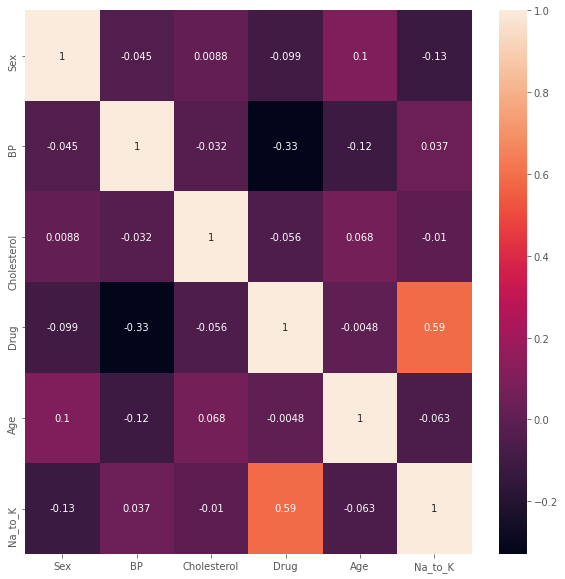

In [19]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

#### Na_K is the most importent feature for predicting drug type

### Reordering the dataset

In [20]:
feature_list = ['Sex', 'BP', 'Cholesterol', 'Age', 'Na_to_K', 'Drug']
df = df[feature_list]
df.head()

,Sex,BP,Cholesterol,Age,Na_to_K,Drug
0,0,2,1,-1.291591,1.286522,4
1,1,0,1,0.162699,-0.415145,2
2,1,0,1,0.162699,-0.828558,2
3,0,1,1,-0.988614,-1.149963,3
4,0,0,1,1.011034,0.271794,4


In [21]:
#splitting in dependent and independent features 

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

## Creating and training the model

### Making train test split

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.4)

### Model 1 : logisticRegression 

In [23]:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression(multi_class='ovr')

### Model 2 : RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators=200, n_jobs=-1)

### Model 3: GradientBoostClassifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

model_3 = GradientBoostingClassifier(n_estimators=200)

### Model 4 : KNN Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier

model_4 = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

## Finding accuracy of the models
### using Cross Validation Score

In [27]:
from sklearn.model_selection import cross_val_score

score1 = cross_val_score(model_1, x, y)
score2 = cross_val_score(model_2, x, y)
score3 = cross_val_score(model_3, x, y)
score4 = cross_val_score(model_4, x, y)

In [28]:
print("model 1 : ", score1.mean())
print("model 2 : ", score2.mean())
print("model 3 : ", score3.mean())
print("model 4 : ", score4.mean())

model 1 :  0.86
model 2 :  0.985
model 3 :  0.97
model 4 :  0.875


##### Gradient Boost and Random forest classifiers do a better job at classifying the drugs

## Prediction and analysis

##### Model 2 RandomForestClassifier

In [29]:
model_2.fit(x_train, y_train)
y_pred = model_2.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, r2_score

print("randomForestClassifier Confusion confusion_matrix\n", confusion_matrix(y_test, y_pred))

randomForestClassifier Confusion confusion_matrix
 [[14  1  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0 33  0]
 [ 0  0  0  0 56]]


In [31]:
print("RandomForestClassifier classification_report : \n", classification_report(y_test, y_pred))

RandomForestClassifier classification_report : 
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        56

    accuracy                           0.99       120
   macro avg       0.97      0.99      0.98       120
weighted avg       0.99      0.99      0.99       120



##### Model 3 Gradient Boost

In [32]:
model_3.fit(x_train, y_train)
y_pred_2 = model_3.predict(x_test)

In [33]:
print("Gradient Boost classification_report : \n", classification_report(y_test, y_pred_2))
print("\nGradient Boost confusion_matrix : \n", confusion_matrix(y_test, y_pred_2))

Gradient Boost classification_report : 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         9
           3       0.92      1.00      0.96        33
           4       0.98      1.00      0.99        56

    accuracy                           0.97       120
   macro avg       0.98      0.93      0.95       120
weighted avg       0.97      0.97      0.97       120


Gradient Boost confusion_matrix : 
 [[12  0  0  3  0]
 [ 0  6  0  0  1]
 [ 0  0  9  0  0]
 [ 0  0  0 33  0]
 [ 0  0  0  0 56]]


## R squared score

#### RandomForestClassifier

In [34]:
r2_score_1 = r2_score(y_test, y_pred)
r2_score_1*100

99.55908289241623

#### GradientBoostClassifier

In [35]:
r2_score_2 = r2_score(y_test, y_pred_2)
r2_score_2*100

84.12698412698413

## Saving predictions

In [48]:
predictions = pd.DataFrame([a for a in range(len(y_test))], columns=['index'])
predictions.head()

,index
0,0
1,1
2,2
3,3
4,4


In [49]:
predictions['actual_labels'] = y_test
predictions['random_forest_predicitons'] = y_pred
predictions['gradiet_boost_predicitons'] = y_pred_2

In [54]:
predictions.drop('index', axis=1, inplace=True)
predictions.head()

,actual_labels,random_forest_predicitons,gradiet_boost_predicitons
0,4.0,2,2
1,NaN,4,4
2,NaN,0,0
3,3.0,3,3
4,NaN,3,3


In [55]:
predictions.to_csv('predictions.csv')

## Conclusion

#### Random Forest Classifier : 98.7660% r squred score
#### Gradient Boost Classifier: 92.1850% r squared score

## Saving the models

In [36]:
import joblib

joblib.dump(model_2, 'randomForestClassifier_model')
joblib.dump(model_3, 'GradientBoostClassifier_model')

['GradientBoostClassifier_model']